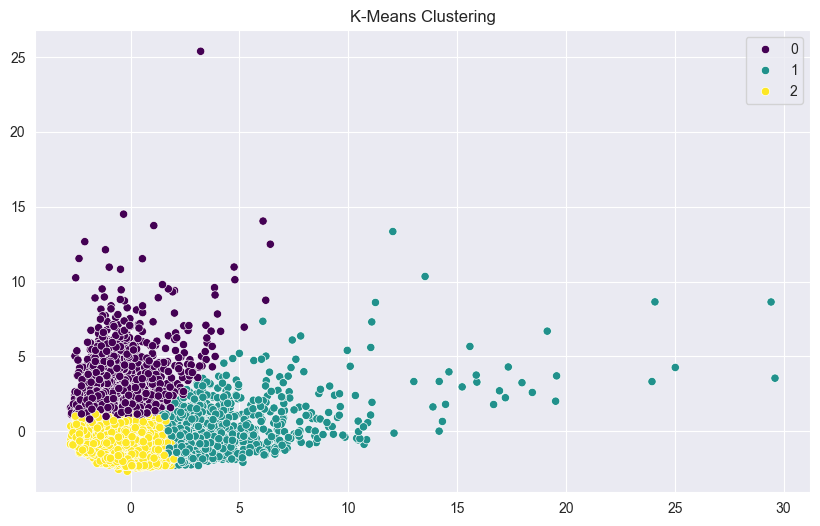

Silhouette Score: 0.25055570796307736


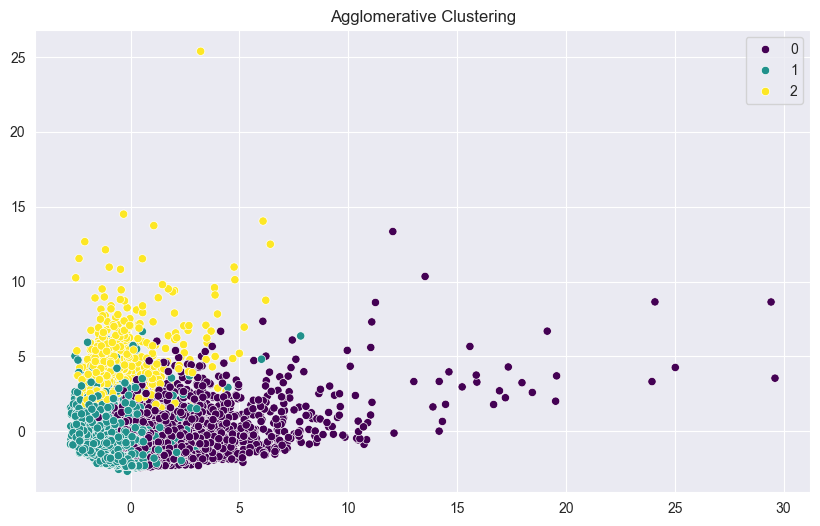

Silhouette Score: 0.1731098007232828


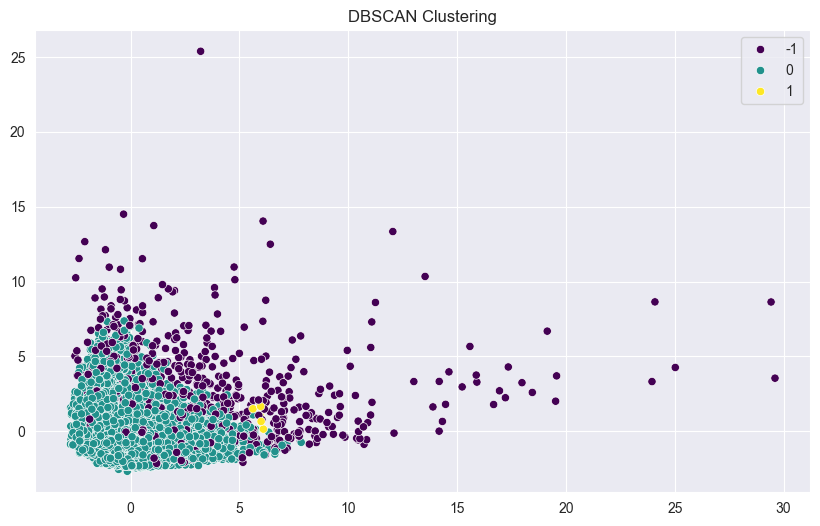

Silhouette Score: 0.3970279181847056


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("dataset/cc_general.csv")

# Drop the 'CUST_ID' column as it's an identifier
df = df.drop("CUST_ID", axis=1)

# Handling missing values (if any)
df.fillna(df.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Principal Component Analysis (PCA) for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Function to perform clustering and visualize results
def perform_clustering(clustering_algo, data, title):
    labels = clustering_algo.fit_predict(data)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette="viridis", legend="full")
    plt.title(title)
    plt.show()

    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg}")

# K-means clustering
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
perform_clustering(kmeans, df_scaled, "K-Means Clustering")

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
perform_clustering(agg_clustering, df_scaled, "Agglomerative Clustering")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
perform_clustering(dbscan, df_scaled, "DBSCAN Clustering")


In [40]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Function to evaluate clustering metrics
def evaluate_metrics(data, labels,name):
    silhouette_avg = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    print(f"Name: {name}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
evaluate_metrics(df_scaled, kmeans_labels,"kmeans")

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)
evaluate_metrics(df_scaled, agg_labels,"agg_clustering")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
evaluate_metrics(df_scaled, dbscan_labels,"dbscan")


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Name: kmeans
Silhouette Score: 0.25055570796307736
Calinski-Harabasz Index: 1604.3967170808128
Davies-Bouldin Index: 1.5972709940037866
Name: agg_clustering
Silhouette Score: 0.1731098007232828
Calinski-Harabasz Index: 1270.5039171504427
Davies-Bouldin Index: 1.797923175689862
Name: dbscan
Silhouette Score: 0.3970279181847056
Calinski-Harabasz Index: 487.95983647748756
Davies-Bouldin Index: 1.9726971449037343


- Silhouette Score показывает степень схожести объектов внутри кластера по сравнению с объектами в других кластерах. Ближе к 1 лучше.
- Calinski-Harabasz Index измеряет отношение между внутрикластерным разбросом и межкластерным разбросом. Большие значения указывают на более четкую границу между кластерами.
- Davies-Bouldin Index показывает, насколько каждый кластер похож на свой самый похожий кластер. Меньшие значения лучше.

Выводы:

DBSCAN демонстрирует лучшие результаты с более высоким Silhouette Score и относительно низким
Davies-Bouldin Index, что может указывать на более четкие и различимые кластеры.

K-means также показывает хорошие результаты, особенно по Calinski-Harabasz Index.

Agglomerative Clustering имеет менее высокие значения метрик, что может указывать на более размытые или перекрывающиеся кластеры.